4/16 I think it could be informing to myself to investigate some figures about median income for both the us and at state levels. This could help me understand what income really is around the country and what is reasonable to expect. 

In [1]:
#going to use apis to get fred info found in the apis notebook

#https://fred.stlouisfed.org/docs/api/fred/ not really sure how helpful this link is

The wikipedia page isn't that insightful, but an api is a way to directly query a webserver and (in our case) ask for data. An api provides several advantages:

You only download the data you need
You do not need to distribute data files with your code
You have access to the 'freshest data'
There are downsides, to using apis, too.

cons: 

You need to be online to retrieve the data
The group hosting the data may 'revise' the data, making it difficult to replicate you results
The api may change, breaking your code.

The package pandas_datareader collects functions that interact with several popular data sources to access their apis. These include

~~Google finance~~
Morningstar
St. Louis Fed's Fred (one of my favorites)
The World Bank
Eurostat
Quandl

API keys
Many data providers do not want some anonymous account connecting to the api and downloading data. These providers ask you to create an account and you are given an api key that you pass along with your request. Sometimes keys are free, sometimes they are not.


What Is Seasonal Adjustment?
A seasonal adjustment is a statistical technique designed to even out periodic swings in statistics or movements in supply and demand related to changing seasons. It can, therefore, eliminate misleading seasonal components of an economic time series. Seasonal adjustment is a method of data-smoothing that is used to predict economic performance or company sales for a given period.

Seasonal adjustments provide a clearer view of nonseasonal trends and cyclical data that would otherwise be overshadowed by seasonal differences. This adjustment allows economists and statisticians to better understand the underlying base trends in a given time series.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#going to start by getting some practice reading in the files so that we know where to find the codes

#first, unemployment rate and gdp. I'm 99% sure both are seasonally adjusted 
codes = ['UNRATE', 'GDP']

# If you do not spec an end date it returns up to the most recent date.
# You can also pass datetime objects as start and end. 
fred = web.DataReader('SLUEM1524ZSURY', 'fred', start='1960-01-01')

fred.head(5)

,UNRATE,GDP
DATE,,
1960-01-01,5.2,542.648
1960-02-01,4.8,NaN
1960-03-01,5.4,NaN
1960-04-01,5.2,541.080
1960-05-01,5.1,NaN


The fred website tells us that unemp is recorded monthly while gdp is recorded quarterly. This tracks with our dataframe above. Now, we will need to look into resampling to get these to line up. I will practice that now

Quick rundown:

We can resample the data to change its frequency.

We are downsampling data if we are reducing the number of observations (daily→
monthly) and we are upsampling the data if we are increasing the number of observations (monthly→
daily). In my work, I have downsampled a lot. I do not think I have ever upsampled.

When we downsample, we need to tell pandas how we want the data aggregated: for example, we might want it summed, or averaged.

When we resample, we create a new DataFrame to hold the new data. The index in the new data will be of a different frequency than the old data, so it is easiest to have different DataFrames. !!!!

In [4]:
#creating a new dataframe where all the data is quarterly

fred_q = fred.resample('q').mean()
fred_q

,UNRATE,GDP
DATE,,
1960-03-31,5.133333,542.648
1960-06-30,5.233333,541.080
1960-09-30,5.533333,545.604
1960-12-31,6.266667,540.197
1961-03-31,6.800000,545.018
...,...,...
2023-03-31,3.500000,26813.601
2023-06-30,3.566667,27063.012
2023-09-30,3.700000,27610.128


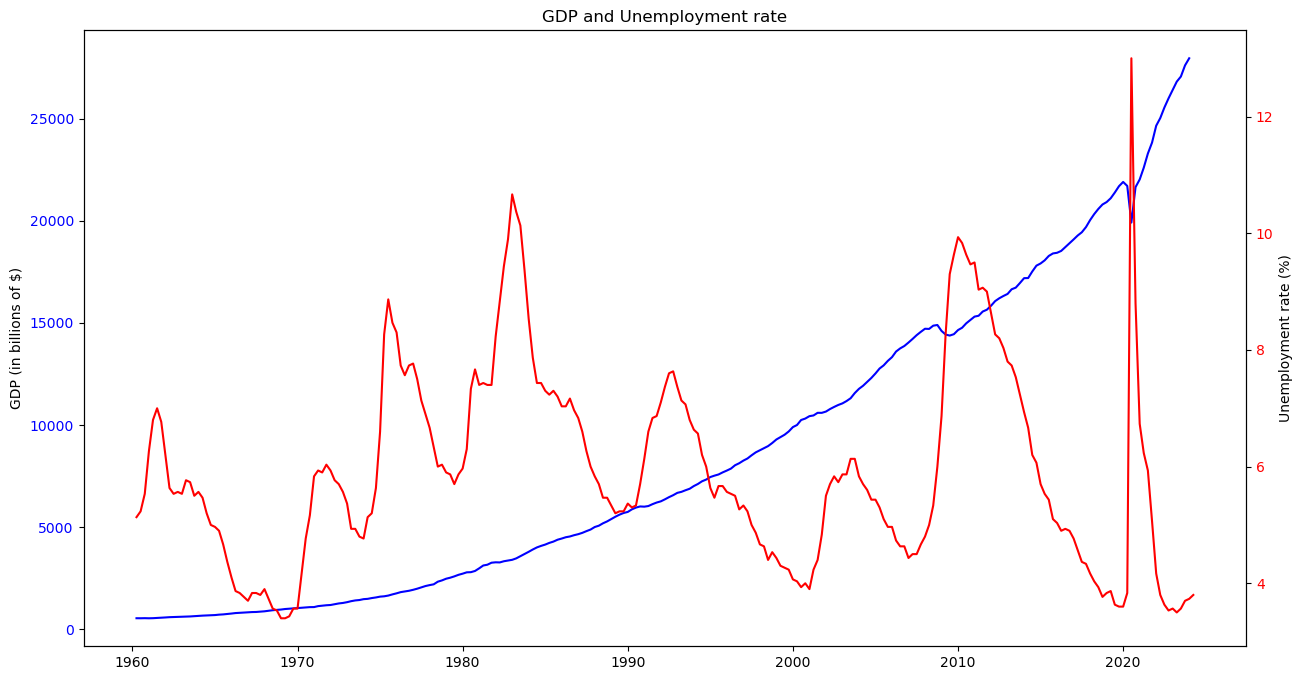

In [5]:
#I think we want a twin axis where the x is always the date (looked at gdp for this)

fig, ax1 = plt.subplots(figsize=(15, 8))

#plotting gpd on the first axis
ax1.plot(fred_q.index, fred_q['GDP'], color='blue')
ax1.set(ylabel='GDP (in billions of $)')
ax1.tick_params(axis='y', labelcolor='blue')

#setting the twin axis
ax2 = ax1.twinx()

#plotting unemp on the second axis
ax2.plot(fred_q.index, fred_q['UNRATE'], color='red')
ax2.set(ylabel='Unemployment rate (%)', title='GDP and Unemployment rate')
ax2.tick_params(axis='y', labelcolor='red')

#having some trouble getting the spines off

plt.show()

In [6]:
#Next lets look at average hourly earnings of all employees (private) and consumer price Index for All Urban Consumers: All Items in U.S. City Average

#average hourly: https://fred.stlouisfed.org/series/CES0500000003
#cpi: https://fred.stlouisfed.org/series/CPIAUCSL     
#Both are seasonally adjusted and have a monthly freq 

codes_2 = ['CES0500000003', 'CPIAUCSL']

fred_2 = web.DataReader(codes_2, 'fred', start='2006-03-01') #avg_hourly starts at this date

fred_2.head(2)

,CES0500000003,CPIAUCSL
DATE,,
2006-03-01,20.05,199.7
2006-04-01,20.15,200.7


In [8]:
#lets rename the columns
fred_2 = fred_2.rename(columns={'CES0500000003': 'avg_earn', 'CPIAUCSL':'cpi'})

fred_2['inf'] = fred_2['cpi'].pct_change()*100 #Doing this step to get inflation into a measure as we talk about it today
fred_2.head()

,avg_earn,cpi,inf
DATE,,,
2006-03-01,20.05,199.7,NaN
2006-04-01,20.15,200.7,0.500751
2006-05-01,20.13,201.3,0.298954
2006-06-01,20.23,201.8,0.248385
2006-07-01,20.29,202.9,0.545094


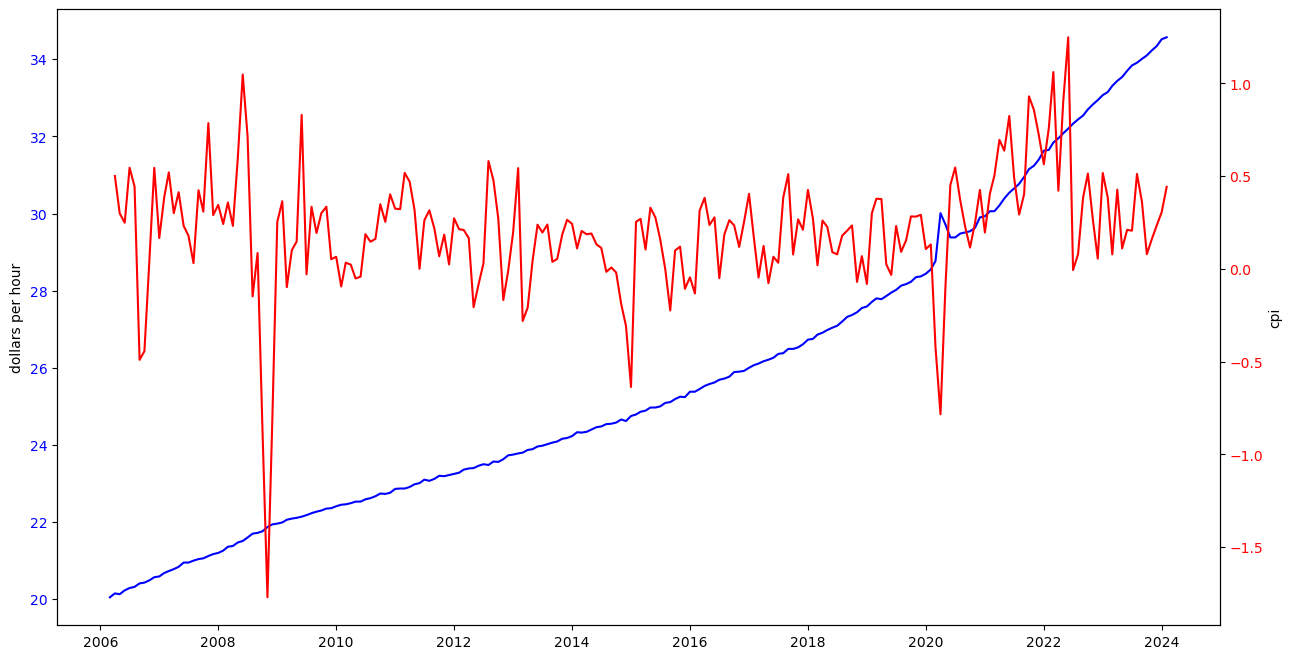

In [9]:
#I think we want a twin axis where the x is always the date (looked at gdp for this)

fig, ax1 = plt.subplots(figsize=(15, 8))

#plotting gpd on the first axis
ax1.plot(fred_2.index, fred_2['avg_earn'], color='blue')
ax1.set(ylabel='dollars per hour')
ax1.tick_params(axis='y', labelcolor='blue')

#setting the twin axis
ax2 = ax1.twinx()

#plotting unemp on the second axis
ax2.plot(fred_2.index, fred_2['inf'], color='red')
ax2.set(ylabel='inflation (%)')
ax2.tick_params(axis='y', labelcolor='red')

#having some trouble getting the spines off

plt.show()

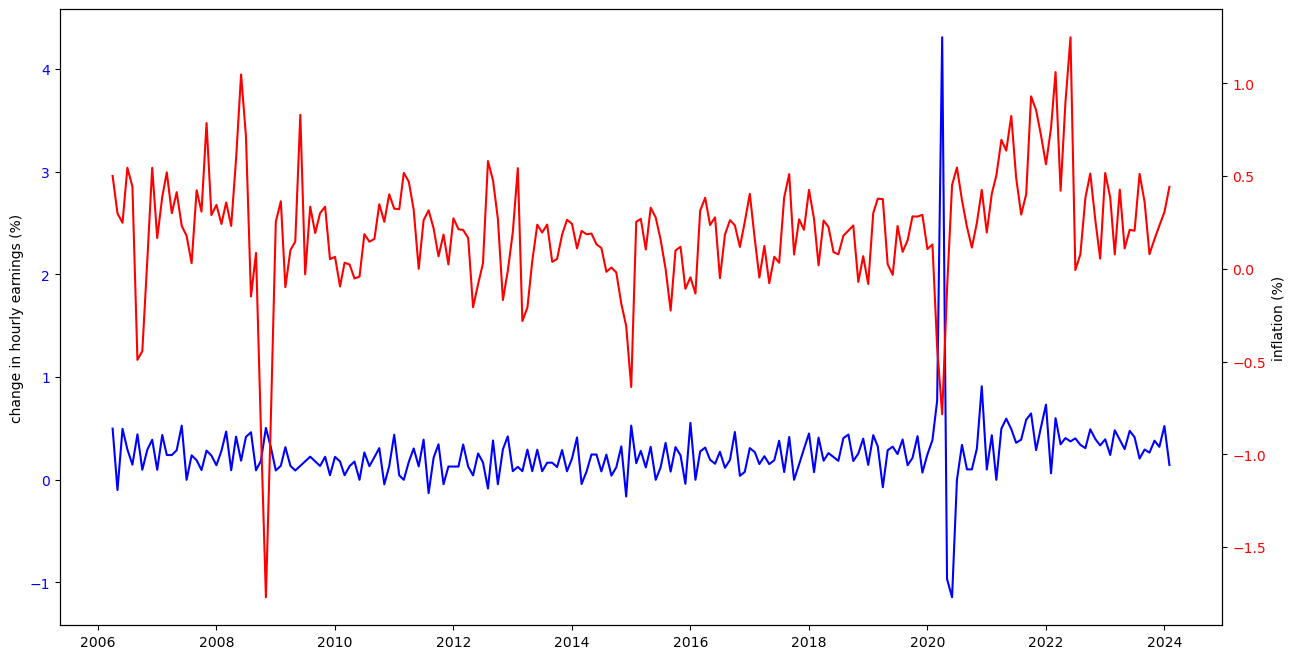

In [10]:
#Going to make a slight change and get average hourly into a pct_change

fred_2['earn_change'] = fred_2['avg_earn'].pct_change()*100 #Doing this step to get avg hourly earnings into a percent change measure to see how it compares to the graph

fig, ax1 = plt.subplots(figsize=(15, 8))

#plotting gpd on the first axis
ax1.plot(fred_2.index, fred_2['earn_change'], color='blue')
ax1.set(ylabel='change in hourly earnings (%)')
ax1.tick_params(axis='y', labelcolor='blue')

#setting the twin axis
ax2 = ax1.twinx()

#plotting unemp on the second axis
ax2.plot(fred_2.index, fred_2['inf'], color='red')
ax2.set(ylabel='inflation (%)')
ax2.tick_params(axis='y', labelcolor='red')

#having some trouble getting the spines off

plt.show()


Looking at this graph, we see that the change in inflation has much larger magnitude than the changes in hourly earnings. The change in hourly earnings is pretty consistent between 0 and 0.5. Looking at the previous graph, it has a slop that seems pretty conistent, which makes sense. 

In [12]:
#doing a basic ols regression just to kinda show that these variables seem unrelated (inf will be y)
#reg_check = smf.ols('inf ~ earn_change', data=fred_2)
#print(reg_check.summary())

#Don't really understand this error message but I'm not too hung up on it

PatsyError: numbers besides '0' and '1' are only allowed with **
    inf ~ earn_change
    ^^^